In [66]:
# STEP 1: Load & Inspect the Dataset

import pandas as pd

# 🧠 Load your dataset (make sure selected_features.csv is in the same folder)
df = pd.read_csv("../data/selected_features.csv")

# ✅ Basic Info
print("🔹 Dataset Loaded Successfully!")
print(f"📦 Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# 🧾 Show column names
print("🔸 Columns in Dataset:")
display(df.columns.tolist())

# 📊 Data types
print("\n🔸 Data Types:")
display(df.dtypes)

# 👀 Preview first 5 rows
print("\n🔹 First 5 Rows of Data:")
display(df.head())

# 🧩 Check for missing values
print("\n🔸 Missing Values per Column:")
display(df.isnull().sum())


🔹 Dataset Loaded Successfully!
📦 Shape: 2000 rows × 16 columns

🔸 Columns in Dataset:


['Waste_Segregation_Level_%',
 'Decomposition_Efficiency_%',
 'Recycling_Rate_%',
 'Hazardous_Waste_Treatment_Compliance',
 'Govt_Compliance_Status',
 'ISO_14001_Certified',
 'Zero_Waste_Landfill_Certified',
 'Waste_to_Energy_Usage',
 'CO2_Emissions_tons_per_year',
 'Methane_Emissions_tons_per_year',
 'Environmental_Fines_Count',
 'Employee_Training_in_Waste_Management',
 'Digital_Waste_Tracking',
 'Frequency_of_Waste_Audit_per_year',
 'Eco_Friendly_Raw_Materials_%',
 'Perfect_Waste_Decomposition_System']


🔸 Data Types:


Waste_Segregation_Level_%                  int64
Decomposition_Efficiency_%               float64
Recycling_Rate_%                         float64
Hazardous_Waste_Treatment_Compliance      object
Govt_Compliance_Status                    object
ISO_14001_Certified                       object
Zero_Waste_Landfill_Certified             object
Waste_to_Energy_Usage                     object
CO2_Emissions_tons_per_year              float64
Methane_Emissions_tons_per_year          float64
Environmental_Fines_Count                  int64
Employee_Training_in_Waste_Management     object
Digital_Waste_Tracking                    object
Frequency_of_Waste_Audit_per_year          int64
Eco_Friendly_Raw_Materials_%               int64
Perfect_Waste_Decomposition_System         int64
dtype: object


🔹 First 5 Rows of Data:


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,64,93.19,63.16,No,Pending,No,No,Yes,617.65,12.45,11,No,Yes,5,36,0
1,66,82.49,14.20,Yes,Compliant,Yes,No,Yes,13.50,144.71,0,No,Yes,11,78,1
2,67,88.21,16.55,No,Non-Compliant,No,No,No,648.65,245.32,12,Yes,No,4,53,0
3,43,96.46,66.70,No,Pending,Yes,No,No,194.15,34.66,0,Yes,Yes,7,90,1
4,72,84.62,33.53,Yes,Compliant,No,Yes,Yes,340.66,180.36,4,No,Yes,6,78,1



🔸 Missing Values per Column:


Waste_Segregation_Level_%                0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Govt_Compliance_Status                   0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Waste_to_Energy_Usage                    0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Environmental_Fines_Count                0
Employee_Training_in_Waste_Management    0
Digital_Waste_Tracking                   0
Frequency_of_Waste_Audit_per_year        0
Eco_Friendly_Raw_Materials_%             0
Perfect_Waste_Decomposition_System       0
dtype: int64

In [67]:
# STEP 2: Handle Missing Values

# 1️⃣ Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

print("🔹 Numerical Columns:", num_cols.tolist())
print("🔸 Categorical Columns:", cat_cols.tolist())

# 2️⃣ Fill missing numerical values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3️⃣ Fill missing categorical values with mode (most frequent) or 'Unknown'
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown", inplace=True)

# 4️⃣ Check again for missing values
print("\n✅ Missing values after cleaning:")
display(df.isnull().sum())

# 5️⃣ Optional: show confirmation
print("\n🎯 All missing values handled successfully!")


🔹 Numerical Columns: ['Waste_Segregation_Level_%', 'Decomposition_Efficiency_%', 'Recycling_Rate_%', 'CO2_Emissions_tons_per_year', 'Methane_Emissions_tons_per_year', 'Environmental_Fines_Count', 'Frequency_of_Waste_Audit_per_year', 'Eco_Friendly_Raw_Materials_%', 'Perfect_Waste_Decomposition_System']
🔸 Categorical Columns: ['Hazardous_Waste_Treatment_Compliance', 'Govt_Compliance_Status', 'ISO_14001_Certified', 'Zero_Waste_Landfill_Certified', 'Waste_to_Energy_Usage', 'Employee_Training_in_Waste_Management', 'Digital_Waste_Tracking']

✅ Missing values after cleaning:


Waste_Segregation_Level_%                0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Govt_Compliance_Status                   0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Waste_to_Energy_Usage                    0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Environmental_Fines_Count                0
Employee_Training_in_Waste_Management    0
Digital_Waste_Tracking                   0
Frequency_of_Waste_Audit_per_year        0
Eco_Friendly_Raw_Materials_%             0
Perfect_Waste_Decomposition_System       0
dtype: int64


🎯 All missing values handled successfully!


In [68]:
# STEP 3: Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

display(df.head())


# 1️⃣ Identify categorical columns again
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("🔸 Categorical Columns to Encode:")
display(cat_cols)

# 2️⃣ Initialize label encoder
le = LabelEncoder()

# 3️⃣ Encode each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("\n✅ Encoding completed successfully!")

# 4️⃣ Verify encoding result
print("\n🔹 Encoded Data Preview:")
display(df.head())

# 5️⃣ Check data types after encoding
print("\n🔸 Data Types after Encoding:")
display(df.dtypes)
print(df.shape)

df.to_csv("../data/cleaned_compliance_data.csv", index=False)


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,64,93.19,63.16,No,Pending,No,No,Yes,617.65,12.45,11,No,Yes,5,36,0
1,66,82.49,14.20,Yes,Compliant,Yes,No,Yes,13.50,144.71,0,No,Yes,11,78,1
2,67,88.21,16.55,No,Non-Compliant,No,No,No,648.65,245.32,12,Yes,No,4,53,0
3,43,96.46,66.70,No,Pending,Yes,No,No,194.15,34.66,0,Yes,Yes,7,90,1
4,72,84.62,33.53,Yes,Compliant,No,Yes,Yes,340.66,180.36,4,No,Yes,6,78,1


🔸 Categorical Columns to Encode:


Index(['Hazardous_Waste_Treatment_Compliance', 'Govt_Compliance_Status',
       'ISO_14001_Certified', 'Zero_Waste_Landfill_Certified',
       'Waste_to_Energy_Usage', 'Employee_Training_in_Waste_Management',
       'Digital_Waste_Tracking'],
      dtype='object')


✅ Encoding completed successfully!

🔹 Encoded Data Preview:


,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Govt_Compliance_Status,ISO_14001_Certified,Zero_Waste_Landfill_Certified,Waste_to_Energy_Usage,CO2_Emissions_tons_per_year,Methane_Emissions_tons_per_year,Environmental_Fines_Count,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,Perfect_Waste_Decomposition_System
0,64,93.19,63.16,0,2,0,0,1,617.65,12.45,11,0,1,5,36,0
1,66,82.49,14.20,1,0,1,0,1,13.50,144.71,0,0,1,11,78,1
2,67,88.21,16.55,0,1,0,0,0,648.65,245.32,12,1,0,4,53,0
3,43,96.46,66.70,0,2,1,0,0,194.15,34.66,0,1,1,7,90,1
4,72,84.62,33.53,1,0,0,1,1,340.66,180.36,4,0,1,6,78,1



🔸 Data Types after Encoding:


Waste_Segregation_Level_%                  int64
Decomposition_Efficiency_%               float64
Recycling_Rate_%                         float64
Hazardous_Waste_Treatment_Compliance       int64
Govt_Compliance_Status                     int64
ISO_14001_Certified                        int64
Zero_Waste_Landfill_Certified              int64
Waste_to_Energy_Usage                      int64
CO2_Emissions_tons_per_year              float64
Methane_Emissions_tons_per_year          float64
Environmental_Fines_Count                  int64
Employee_Training_in_Waste_Management      int64
Digital_Waste_Tracking                     int64
Frequency_of_Waste_Audit_per_year          int64
Eco_Friendly_Raw_Materials_%               int64
Perfect_Waste_Decomposition_System         int64
dtype: object

(2000, 16)


In [69]:
# STEP 4: Feature Scaling + PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 🧠 Separate target column before scaling
target_col = "Perfect_Waste_Decomposition_System"
X = df.drop(columns=[target_col])
y = df[target_col]

# 1️⃣ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1a️⃣ Save scaled features + target before PCA
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled[target_col] = y.values
df_scaled.to_csv("../data/cleaned_compliance_data_scaled.csv", index=False)
print("✅ Scaled dataset saved: cleaned_compliance_data_scaled.csv")

# 2️⃣ Apply PCA - keep 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3️⃣ Create a new DataFrame for PCA-transformed features
pca_columns = [f"PCA_{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# 4️⃣ Add back the target column
df_pca[target_col] = y.values

# 5️⃣ Save the PCA dataset
df_pca.to_csv("../data/cleaned_compliance_data_pca.csv", index=False)
print("✅ PCA dataset saved: cleaned_compliance_data_pca.csv")

# 6️⃣ Display summary
print(f"🔹 Original Features: {X.shape[1]}")
print(f"🔸 PCA Components Retained: {X_pca.shape[1]}")
display(df_pca.head())
print(f"📦 Final PCA Dataset Shape: {df_pca.shape[0]} rows × {df_pca.shape[1]} columns")


✅ Scaled dataset saved: cleaned_compliance_data_scaled.csv
✅ PCA dataset saved: cleaned_compliance_data_pca.csv
🔹 Original Features: 15
🔸 PCA Components Retained: 14


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,Perfect_Waste_Decomposition_System
0,-2.069174,-0.073353,1.083839,-0.430809,-0.591593,-1.933216,-0.743205,1.090049,-1.908234,0.531402,1.152707,0.077172,0.472770,-0.130517,0
1,2.103060,-0.621045,0.214627,1.660722,-1.616926,1.482670,-1.024353,-0.912742,-0.877040,0.548172,1.033036,-0.673365,-0.639581,-0.211835,1
2,-1.999520,2.087814,-0.191926,1.225173,-0.515066,-1.021183,1.415613,-0.100013,-0.590923,-0.568190,-0.636357,0.743827,-0.967173,0.324511,0
3,0.541214,-2.216531,0.433022,1.108177,-0.518295,-1.622052,0.616364,-1.505881,-0.959388,-0.935674,0.807641,0.435431,1.001290,1.623936,1
4,1.199283,0.515859,0.609952,0.756844,-0.636953,0.288895,-0.168748,1.358086,-0.282852,1.031574,0.305272,-1.669713,-0.675529,0.256224,1


📦 Final PCA Dataset Shape: 2000 rows × 15 columns


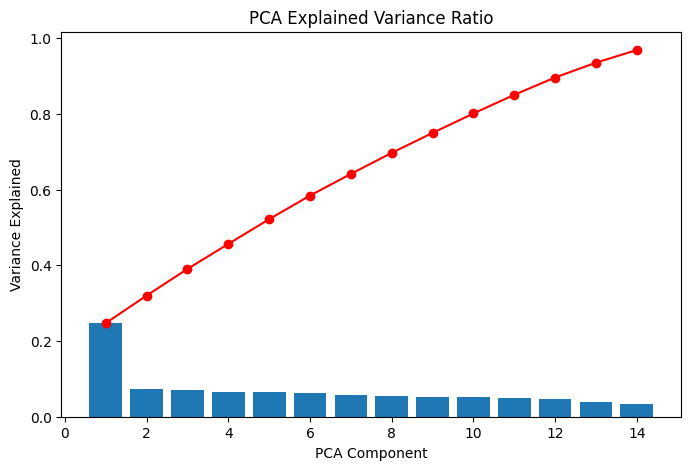

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), color='red', marker='o')
plt.xlabel("PCA Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance Ratio")
plt.show()
